# Hypothesis 2: Gender Differences in Spending
## Step-by-Step Implementation in Python

**Research Question:** Is there a significant difference in average spending between male and female customers?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
customer_path = '../datasets/Customers_v4.csv'
sales_path = '../datasets/Sales_Cleaned.csv'

df_customers = pd.read_csv(customer_path)
print(f"Customers loaded: {len(df_customers)} customers")
print(f"Gender distribution: {df_customers['Gender'].value_counts().to_dict()}")

df_sales = pd.read_csv(sales_path, sep=';')
print(f"Sales loaded: {len(df_sales)} transactions")

Customers loaded: 1000 customers
Gender distribution: {'Female': 511, 'Male': 489}
Sales loaded: 25000 transactions


In [4]:
# Clean up column names (remove any trailing/leading spaces)
df_sales.columns = df_sales.columns.str.strip()
df_customers.columns = df_customers.columns.str.strip()

# Convert 'Total Spent' from currency format (comma as decimal) to numeric
df_sales['Total Spent'] = df_sales['Total Spent'].str.replace(',', '.').astype(float)

# Display basic information about the datasets
print("\n" + "=" * 80)
print("\nSales Dataset Info:")
print(f"Columns: {list(df_sales.columns[:5])}...")

print("\nCustomer Dataset Info:")
print(f"Shape: {df_customers.shape}")
print(f"Columns: {list(df_customers.columns)}")

print(df_sales[['Customer ID', 'Total Spent']].head(3))



Sales Dataset Info:
Columns: ['Transaction Key', 'Transaction ID', 'Customer ID', 'Location', 'Payment Method']...

Customer Dataset Info:
Shape: (1000, 9)
Columns: ['Customer ID', 'Customer Name', 'Gender', 'City', 'Province/State', 'Region', 'Membership Level', 'Customer Age', 'Tenure (Years)']
  Customer ID  Total Spent
0   CUST_0175       180.08
1   CUST_0516        39.90
2   CUST_0311        61.95


## Data Preparation and Aggregation

We calculate the **Mean Total Spent per customer** (not per transaction).

**WHY:** Each customer may have multiple transactions. To avoid bias from customers with more transactions, we need to:
1. Group all transactions by CustomerID and Gender
2. Calculate the total spending for each customer
3. Compare the means between gender groups

In [5]:
# Check for missing values in sales data
print("\n1. Missing Values in Sales Data:")
missing_sales = df_sales[['Customer ID', 'Total Spent']].isnull().sum()
print(missing_sales)

# Check for missing values in customer data
print("\n2. Missing Values in Customer Data:")
missing_customers = df_customers[['Customer ID', 'Gender']].isnull().sum()
print(missing_customers)

# Check Gender column values
print("\n3. Gender Column Values:")
print(df_customers['Gender'].value_counts())
print(f"\nUnique genders: {df_customers['Gender'].unique()}")

# Check for any mismatched Customer IDs
print("\n4. Customer ID Matching:")
sales_customers = set(df_sales['Customer ID'].unique())
demographic_customers = set(df_customers['Customer ID'].unique())
print(f"Customers in sales data: {len(sales_customers)}")
print(f"Customers in demographics data: {len(demographic_customers)}")
print(f"Customers in both: {len(sales_customers & demographic_customers)}")



1. Missing Values in Sales Data:
Customer ID    0
Total Spent    0
dtype: int64

2. Missing Values in Customer Data:
Customer ID    0
Gender         0
dtype: int64

3. Gender Column Values:
Gender
Female    511
Male      489
Name: count, dtype: int64

Unique genders: ['Female' 'Male']

4. Customer ID Matching:
Customers in sales data: 1000
Customers in demographics data: 1000
Customers in both: 1000


In [6]:
# Merge to get gender for each transaction
df_merged = df_sales.merge(df_customers[['Customer ID', 'Gender']], 
                            on='Customer ID', 
                            how='inner')

# Group by Customer and Gender to get total spending per customer
customer_spending = df_merged.groupby(['Customer ID', 'Gender'])['Total Spent'].sum().reset_index()
customer_spending.columns = ['CustomerID', 'Gender', 'Total_Spent_Per_Customer']

print(f"Total unique customers: {customer_spending.shape[0]}")
print(f"Gender distribution:")
print(customer_spending['Gender'].value_counts())

print(customer_spending.head(10))

Total unique customers: 1000
Gender distribution:
Gender
Female    511
Male      489
Name: count, dtype: int64
  CustomerID  Gender  Total_Spent_Per_Customer
0  CUST_0001  Female                  15472.37
1  CUST_0002    Male                   9072.23
2  CUST_0003  Female                  24367.65
3  CUST_0004    Male                  10913.30
4  CUST_0005  Female                   7263.53
5  CUST_0006  Female                  11479.52
6  CUST_0007  Female                   8480.72
7  CUST_0008    Male                  10876.20
8  CUST_0009    Male                   2843.74
9  CUST_0010    Male                   5987.79


In [7]:
# Extract spending data for each gender
male_spending = customer_spending[customer_spending['Gender'] == 'Male']['Total_Spent_Per_Customer']
female_spending = customer_spending[customer_spending['Gender'] == 'Female']['Total_Spent_Per_Customer']

# Display basic information about each group
print("GENDER GROUP STATISTICS:")
print(f"\nMale Customers:")
print(f"Sample size (n₁): {len(male_spending)}")
print(f"Mean spending: ${male_spending.mean():.2f}")
print(f"Median spending: ${male_spending.median():.2f}")
print(f"Std deviation: ${male_spending.std():.2f}")
print(f"Min spending: ${male_spending.min():.2f}")
print(f"Max spending: ${male_spending.max():.2f}")

print(f"\nFemale Customers:")
print(f"Sample size (n₂): {len(female_spending)}")
print(f"Mean spending: ${female_spending.mean():.2f}")
print(f"Median spending: ${female_spending.median():.2f}")
print(f"Std deviation: ${female_spending.std():.2f}")
print(f"Min spending: ${female_spending.min():.2f}")
print(f"Max spending: ${female_spending.max():.2f}")

print(f"\nObservation:")
print(f"- Difference in means: ${abs(male_spending.mean() - female_spending.mean()):.2f}")
print(f"- Ratio of standard deviations: {max(male_spending.std(), female_spending.std()) / min(male_spending.std(), female_spending.std()):.2f}")

GENDER GROUP STATISTICS:

Male Customers:
Sample size (n₁): 489
Mean spending: $12528.31
Median spending: $9548.39
Std deviation: $10159.25
Min spending: $935.34
Max spending: $61773.40

Female Customers:
Sample size (n₂): 511
Mean spending: $12542.60
Median spending: $9430.34
Std deviation: $10024.61
Min spending: $1145.50
Max spending: $61285.57

Observation:
- Difference in means: $14.29
- Ratio of standard deviations: 1.01


---
# STEP 1: Formulate the Hypotheses

In [8]:

print("\nNull Hypothesis (H₀):")
print("  There is no difference in average spending between male and female customers.")
print("  Mathematical notation: μ_male = μ_female")
print("  Or equivalently: μ_male - μ_female = 0")

print("\nAlternative Hypothesis (Hₐ):")
print("  There is a difference in average spending between male and female customers.")
print("  Mathematical notation: μ_male ≠ μ_female")

print("\nType of Test: TWO-TAILED TEST")
print("  WHY: We're testing for ANY difference, not a specific direction")



Null Hypothesis (H₀):
  There is no difference in average spending between male and female customers.
  Mathematical notation: μ_male = μ_female
  Or equivalently: μ_male - μ_female = 0

Alternative Hypothesis (Hₐ):
  There is a difference in average spending between male and female customers.
  Mathematical notation: μ_male ≠ μ_female

Type of Test: TWO-TAILED TEST
  WHY: We're testing for ANY difference, not a specific direction


---
# STEP 2: Check the Assumptions

Before conducting a two-sample t-test, we must verify three key assumptions:
1. **Independence**: Observations are independent within and between groups
2. **Normality**: Data in each group follows approximately normal distribution
3. **Homogeneity of Variances**: Variances are approximately equal between groups

In [9]:
print("\n### ASSUMPTION 1: INDEPENDENCE ###")


print("\nVerification:")
print("- Each customer is an independent entity")
print("- One customer's spending doesn't influence another's spending")
print("- Customers are assigned to gender groups naturally")
print("- ach customer appears only once in our aggregated dataset")

# Check: Verify no duplicate customers
n_customers = len(customer_spending)
n_unique_customers = customer_spending['CustomerID'].nunique()
print(f"Total customer records: {n_customers}")
print(f"Unique customers: {n_unique_customers}")

if n_customers == n_unique_customers:
    print("- ASSUMPTION SATISFIED: All customers are unique")
else:
    print("- WARNING: Duplicate customers found - needs investigation")


### ASSUMPTION 1: INDEPENDENCE ###

Verification:
- Each customer is an independent entity
- One customer's spending doesn't influence another's spending
- Customers are assigned to gender groups naturally
- ach customer appears only once in our aggregated dataset
Total customer records: 1000
Unique customers: 1000
- ASSUMPTION SATISFIED: All customers are unique



### ASSUMPTION 2: NORMALITY ###

Method 1: Visual Inspection
Creating histograms and Q-Q plots for each gender group...


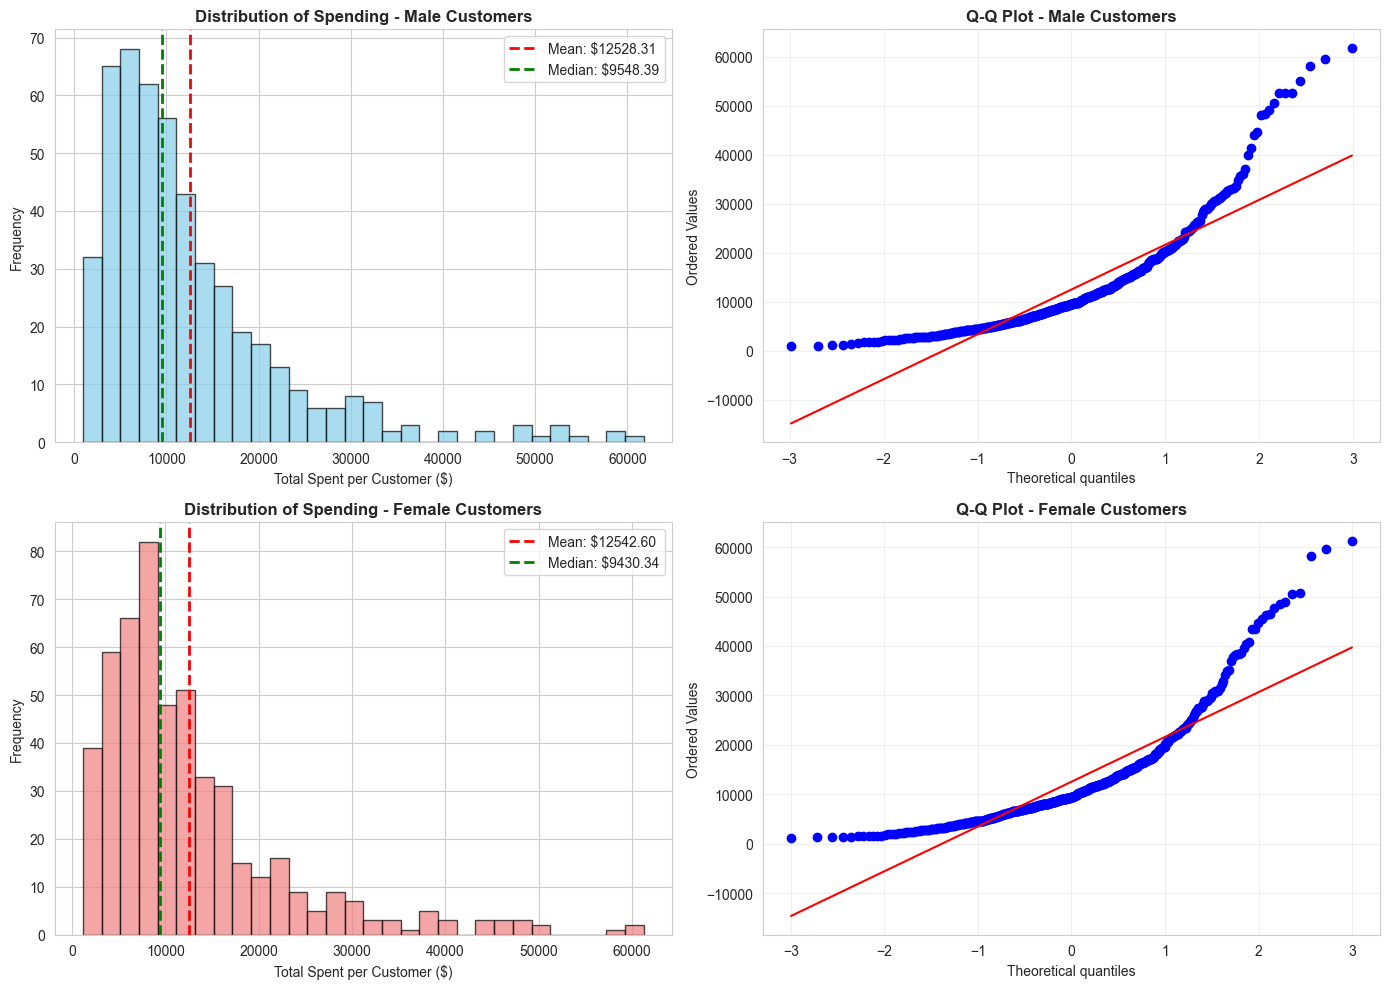

INTERPRETATION OF Q-Q PLOTS:
- If points fall approximately on the diagonal line → data is normally distributed
- Deviations from the line indicate departures from normality


In [10]:
print("\n### ASSUMPTION 2: NORMALITY ###")

# Method 1: Visual inspection with histograms
print("\nMethod 1: Visual Inspection")
print("Creating histograms and Q-Q plots for each gender group...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for Males
axes[0, 0].hist(male_spending, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Spending - Male Customers', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Total Spent per Customer ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(male_spending.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${male_spending.mean():.2f}')
axes[0, 0].axvline(male_spending.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${male_spending.median():.2f}')
axes[0, 0].legend()

# Q-Q plot for Males
stats.probplot(male_spending, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot - Male Customers', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Histogram for Females
axes[1, 0].hist(female_spending, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1, 0].set_title('Distribution of Spending - Female Customers', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Total Spent per Customer ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(female_spending.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${female_spending.mean():.2f}')
axes[1, 0].axvline(female_spending.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${female_spending.median():.2f}')
axes[1, 0].legend()

# Q-Q plot for Females
stats.probplot(female_spending, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Female Customers', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("INTERPRETATION OF Q-Q PLOTS:")
print("- If points fall approximately on the diagonal line → data is normally distributed")
print("- Deviations from the line indicate departures from normality")

In [11]:
# Method 2: Shapiro-Wilk Test for Normality
print("\nMethod 2: Shapiro-Wilk Test")

# Test for males
stat_male, p_male = stats.shapiro(male_spending)
print(f"Male Customers:")
print(f"Test statistic (W): {stat_male:.4f}")
print(f"P-value: {p_male:.4f}")
if p_male > 0.05:
    print(f"RESULT: Fail to reject H₀ (p = {p_male:.4f} > 0.05)")
    print(f"CONCLUSION: Male spending data appears normally distributed")
else:
    print(f"RESULT: Reject H₀ (p = {p_male:.4f} < 0.05)")
    print(f"CONCLUSION: Male spending data deviates from normality")

# Test for females
stat_female, p_female = stats.shapiro(female_spending)
print(f"Female Customers:")
print(f"Test statistic (W): {stat_female:.4f}")
print(f"P-value: {p_female:.4f}")
if p_female > 0.05:
    print(f"RESULT: Fail to reject H₀ (p = {p_female:.4f} > 0.05)")
    print(f"CONCLUSION: Female spending data appears normally distributed")
else:
    print(f"RESULT: Reject H₀ (p = {p_female:.4f} < 0.05)")
    print(f"CONCLUSION: Female spending data deviates from normality")


Method 2: Shapiro-Wilk Test
Male Customers:
Test statistic (W): 0.8066
P-value: 0.0000
RESULT: Reject H₀ (p = 0.0000 < 0.05)
CONCLUSION: Male spending data deviates from normality
Female Customers:
Test statistic (W): 0.8099
P-value: 0.0000
RESULT: Reject H₀ (p = 0.0000 < 0.05)
CONCLUSION: Female spending data deviates from normality


In [12]:
print("\nMethod 3: Central Limit Theorem (CLT)")

print(f"\nSample sizes:")
print(f"Males: n₁ = {len(male_spending)}")
print(f"Females: n₂ = {len(female_spending)}")

if len(male_spending) >= 30 and len(female_spending) >= 30:
    print(f"BOTH samples have n ≥ 30")
    print(f"CONCLUSION: Can invoke CLT - t-test is robust to normality violations")
    normality_satisfied = True
elif p_male > 0.05 and p_female > 0.05:
    print(f"Shapiro-Wilk tests show normality")
    print(f"CONCLUSION: Normality assumption is satisfied")
    normality_satisfied = True
else:
    print(f"Consider non-parametric alternative (Mann-Whitney U test)")
    normality_satisfied = False



Method 3: Central Limit Theorem (CLT)

Sample sizes:
Males: n₁ = 489
Females: n₂ = 511
BOTH samples have n ≥ 30
CONCLUSION: Can invoke CLT - t-test is robust to normality violations


In [13]:
print("\n### ASSUMPTION 3: HOMOGENEITY OF VARIANCES ###")

print("\nMethod 1: Variance Ratio Rule of Thumb")

var_male = male_spending.var()
var_female = female_spending.var()
variance_ratio = max(var_male, var_female) / min(var_male, var_female)

print(f"- Male variance: {var_male:.2f}")
print(f"- Female variance: {var_female:.2f}")
print(f"- Variance ratio: {variance_ratio:.2f}")

if variance_ratio < 4:
    print(f"Ratio ({variance_ratio:.2f}) < 4: Variances can be considered equal")
    equal_var_rule = True
else:
    print(f"Ratio ({variance_ratio:.2f}) ≥ 4: Variances may not be equal")
    equal_var_rule = False


### ASSUMPTION 3: HOMOGENEITY OF VARIANCES ###

Method 1: Variance Ratio Rule of Thumb
- Male variance: 103210411.56
- Female variance: 100492791.42
- Variance ratio: 1.03
Ratio (1.03) < 4: Variances can be considered equal


In [14]:
# Method 2: Levene's Test for Equality of Variances
print("\nMethod 2: Levene's Test")

# Perform Levene's test
levene_stat, levene_p = stats.levene(male_spending, female_spending)

print(f"Test statistic: {levene_stat:.4f}")
print(f"P-value: {levene_p:.4f}")

if levene_p > 0.05:
    print(f"- RESULT: Fail to reject H₀ (p = {levene_p:.4f} > 0.05)")
    print(f"- CONCLUSION: Variances are approximately equal")
    equal_var_levene = True
else:
    print(f"- RESULT: Reject H₀ (p = {levene_p:.4f} < 0.05)")
    print(f"- CONCLUSION: Variances are significantly different")
    equal_var_levene = False

# FINAL DECISION on variance equality
print("\nFINAL DECISION ON EQUAL VARIANCES:")
if equal_var_rule and equal_var_levene:
    print("- Both tests indicate equal variances")
    print("- DECISION: Use standard two-sample t-test with equal_var=True")
    use_equal_var = True
elif equal_var_rule or equal_var_levene:
    print("- Mixed results on variance equality")
    print("- DECISION: Use Welch's t-test (equal_var=False) to be conservative")
    use_equal_var = False
else:
    print("- Both tests indicate unequal variances")
    print("- DECISION: Use Welch's t-test (equal_var=False)")
    use_equal_var = False



Method 2: Levene's Test
Test statistic: 0.0708
P-value: 0.7902
- RESULT: Fail to reject H₀ (p = 0.7902 > 0.05)
- CONCLUSION: Variances are approximately equal

FINAL DECISION ON EQUAL VARIANCES:
- Both tests indicate equal variances
- DECISION: Use standard two-sample t-test with equal_var=True


---
# STEP 3: Conduct the Test

Now that we've verified the assumptions, we can proceed with the two-sample t-test.

In [15]:
print("STEP 3: CONDUCT THE TEST")

# Calculate descriptive statistics first
n1 = len(male_spending)
n2 = len(female_spending)
mean1 = male_spending.mean()
mean2 = female_spending.mean()
std1 = male_spending.std(ddof=1)
std2 = female_spending.std(ddof=1)

print("\nDESCRIPTIVE STATISTICS:")
print(f"\nMale Customers (Group 1):")
print(f"  Sample size (n₁): {n1}")
print(f"  Sample mean (x̄₁): ${mean1:.2f}")
print(f"  Sample std dev (s₁): ${std1:.2f}")
print(f"  Sample variance (s₁²): {std1**2:.2f}")

print(f"\nFemale Customers (Group 2):")
print(f"  Sample size (n₂): {n2}")
print(f"  Sample mean (x̄₂): ${mean2:.2f}")
print(f"  Sample std dev (s₂): ${std2:.2f}")
print(f"  Sample variance (s₂²): {std2**2:.2f}")

print(f"\nDifference in means (x̄₁ - x̄₂): ${mean1 - mean2:.2f}")


STEP 3: CONDUCT THE TEST

DESCRIPTIVE STATISTICS:

Male Customers (Group 1):
  Sample size (n₁): 489
  Sample mean (x̄₁): $12528.31
  Sample std dev (s₁): $10159.25
  Sample variance (s₁²): 103210411.56

Female Customers (Group 2):
  Sample size (n₂): 511
  Sample mean (x̄₂): $12542.60
  Sample std dev (s₂): $10024.61
  Sample variance (s₂²): 100492791.42

Difference in means (x̄₁ - x̄₂): $-14.29


In [16]:
# PERFORM THE TWO-SAMPLE T-TEST
print("\nPERFORMING TWO-SAMPLE T-TEST:")


print(f"\nTest parameters:")
print(f"  Equal variances assumed: {use_equal_var}")
if use_equal_var:
    print(f"  Using: Standard Student's t-test")
else:
    print(f"  Using: Welch's t-test (does not assume equal variances)")
print(f"  Significance level (α): 0.05")
print(f"  Type of test: Two-tailed")

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(male_spending, female_spending, 
                                        equal_var=use_equal_var)

print(f"\nTEST RESULTS:")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  p-value: {p_value:.4f}")

# Calculate degrees of freedom
if use_equal_var:
    # Standard t-test: df = n1 + n2 - 2
    df = n1 + n2 - 2
    print(f"  Degrees of freedom: {df}")
else:
    numerator = (std1**2/n1 + std2**2/n2)**2
    denominator = (std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1)
    df = numerator / denominator
    print(f"  Degrees of freedom (Welch): {df:.2f}")

# Get critical value for two-tailed test
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)
print(f"  Critical t-value (±): ±{critical_value:.4f}")



PERFORMING TWO-SAMPLE T-TEST:

Test parameters:
  Equal variances assumed: True
  Using: Standard Student's t-test
  Significance level (α): 0.05
  Type of test: Two-tailed

TEST RESULTS:
  t-statistic: -0.0224
  p-value: 0.9821
  Degrees of freedom: 998
  Critical t-value (±): ±1.9623


---
# STEP 4: Determine the P-Value and Conclude

In this step, we make our statistical decision and interpret the results.

In [19]:
print("STEP 4: DETERMINE P-VALUE AND CONCLUDE")

# DECISION RULE
print("\nDECISION RULE:")
print(f"  Significance level (α): {alpha}")
print(f"  Decision criteria:")
print(f"    - If p-value < {alpha}: REJECT H₀")
print(f"    - If p-value ≥ {alpha}: FAIL TO REJECT H₀")
print(f"\n  Alternative decision criteria (using t-statistic):")
print(f"    - If |t| > {critical_value:.4f}: REJECT H₀")
print(f"    - If |t| ≤ {critical_value:.4f}: FAIL TO REJECT H₀")

print("\nSTATISTICAL DECISION:")

print(f"\n  Test results summary:")
print(f"    t-statistic: {t_statistic:.4f}")
print(f"    p-value: {p_value:.4f}")
print(f"    Critical value: ±{critical_value:.4f}")
print(f"    Degrees of freedom: {df if use_equal_var else f'{df:.2f}'}")

# Make decision
if p_value < alpha:
    decision = "REJECT"
    print(f"\n  DECISION: REJECT H₀")
    print(f"    WHY: p-value ({p_value:.4f}) < α ({alpha})")
    print(f"    AND: |t| = {abs(t_statistic):.4f} > {critical_value:.4f}")
else:
    decision = "FAIL TO REJECT"
    print(f"\n  DECISION: FAIL TO REJECT H₀")
    print(f"    WHY: p-value ({p_value:.4f}) ≥ α ({alpha})")
    print(f"    AND: |t| = {abs(t_statistic):.4f} ≤ {critical_value:.4f}")


STEP 4: DETERMINE P-VALUE AND CONCLUDE

DECISION RULE:
  Significance level (α): 0.05
  Decision criteria:
    - If p-value < 0.05: REJECT H₀
    - If p-value ≥ 0.05: FAIL TO REJECT H₀

  Alternative decision criteria (using t-statistic):
    - If |t| > 1.9623: REJECT H₀
    - If |t| ≤ 1.9623: FAIL TO REJECT H₀

STATISTICAL DECISION:

  Test results summary:
    t-statistic: -0.0224
    p-value: 0.9821
    Critical value: ±1.9623
    Degrees of freedom: 998

  DECISION: FAIL TO REJECT H₀
    WHY: p-value (0.9821) ≥ α (0.05)
    AND: |t| = 0.0224 ≤ 1.9623


In [21]:
# STATISTICAL CONCLUSION
print("\nSTATISTICAL CONCLUSION:")

if use_equal_var:
    test_name = "independent samples t-test"
    df_format = f"{df}"
else:
    test_name = "Welch's t-test"
    df_format = f"{df:.2f}"

print(f"\n  At the {alpha} significance level, we {decision} the null hypothesis")
print(f"  (t({df_format}) = {t_statistic:.4f}, p = {p_value:.4f}).")

print("\nINTERPRETATION:")

if decision == "REJECT":
    print(f"\n  There IS statistically significant evidence to conclude that there is")
    print(f"  a difference in average spending between male and female customers.")
    print(f"\n  Specifically:")
    if mean1 > mean2:
        print(f"    - Male customers spend significantly MORE than female customers")
        print(f"    - Male mean: ${mean1:.2f} vs Female mean: ${mean2:.2f}")
        print(f"    - Difference: ${mean1 - mean2:.2f}")
    else:
        print(f"    - Female customers spend significantly MORE than male customers")
        print(f"    - Female mean: ${mean2:.2f} vs Male mean: ${mean1:.2f}")
        print(f"    - Difference: ${mean2 - mean1:.2f}")
    

    print(f"    This finding suggests that gender may be an important factor in")
    print(f"    customer spending behavior and should be considered in marketing")
    print(f"    strategies and business decisions.")
else:
    print(f"\n  There is NOT sufficient statistical evidence to conclude that there is")
    print(f"  a difference in average spending between male and female customers.")
    print(f"\n  Specifically:")
    print(f"    - Male mean: ${mean1:.2f}")
    print(f"    - Female mean: ${mean2:.2f}")
    print(f"    - Observed difference: ${abs(mean1 - mean2):.2f}")
    print(f"    - This difference could be due to random sampling variation")
    print(f"    Based on this analysis, gender does not appear to be a significant")
    print(f"    factor in customer spending behavior. Marketing strategies may not")
    print(f"    need to be differentiated by gender.")



STATISTICAL CONCLUSION:

  At the 0.05 significance level, we FAIL TO REJECT the null hypothesis
  (t(998) = -0.0224, p = 0.9821).

INTERPRETATION:

  There is NOT sufficient statistical evidence to conclude that there is
  a difference in average spending between male and female customers.

  Specifically:
    - Male mean: $12528.31
    - Female mean: $12542.60
    - Observed difference: $14.29
    - This difference could be due to random sampling variation
    Based on this analysis, gender does not appear to be a significant
    factor in customer spending behavior. Marketing strategies may not
    need to be differentiated by gender.


---
# STEP 5: Report with Confidence Interval

The final step is to calculate and report a confidence interval for the difference in means.

In [22]:
print("STEP 5: REPORT WITH CONFIDENCE INTERVAL")

confidence_level = 0.95
alpha_ci = 1 - confidence_level

print(f"\nCalculating {confidence_level*100:.0f}% Confidence Interval for Difference in Means")

# Calculate the difference in means
mean_diff = mean1 - mean2
print(f"\n  Observed difference (x̄₁ - x̄₂): ${mean_diff:.2f}")

t_critical_ci = stats.t.ppf(1 - alpha_ci/2, df)
print(f"  Critical t-value (for {confidence_level*100:.0f}% CI): {t_critical_ci:.4f}")

margin_of_error = t_critical_ci * standard_error
print(f"  Standard error: {standard_error:.4f}")
print(f"  Margin of error: {margin_of_error:.2f}")

ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

print(f"\n  95% CONFIDENCE INTERVAL:")
print(f"  ({ci_lower:.2f}, {ci_upper:.2f})")

print(f"\n  Calculation breakdown:")
print(f"    Lower bound = {mean_diff:.2f} - {margin_of_error:.2f} = ${ci_lower:.2f}")
print(f"    Upper bound = {mean_diff:.2f} + {margin_of_error:.2f} = ${ci_upper:.2f}")


STEP 5: REPORT WITH CONFIDENCE INTERVAL

Calculating 95% Confidence Interval for Difference in Means

  Observed difference (x̄₁ - x̄₂): $-14.29
  Critical t-value (for 95% CI): 1.9623
  Standard error: 638.3446
  Margin of error: 1252.65

  95% CONFIDENCE INTERVAL:
  (-1266.95, 1238.36)

  Calculation breakdown:
    Lower bound = -14.29 - 1252.65 = $-1266.95
    Upper bound = -14.29 + 1252.65 = $1238.36


In [23]:
print("\nINTERPRETATION OF CONFIDENCE INTERVAL:")

print(f"\n  We are {confidence_level*100:.0f}% confident that the true mean difference in spending")
print(f"  between male and female customers lies between ${ci_lower:.2f} and ${ci_upper:.2f}.")

if ci_lower <= 0 <= ci_upper:
    print(f"\n  IMPORTANT: The confidence interval INCLUDES zero.")
    print(f"    IMPLICATION: Zero difference is a plausible value.")
    print(f"    This is CONSISTENT with FAILING TO REJECT H₀.")
    print(f"    We cannot be confident there is a true difference in the population.")
else:
    print(f"\n  IMPORTANT: The confidence interval DOES NOT include zero.")
    print(f"    IMPLICATION: Zero difference is NOT a plausible value.")
    print(f"    This is CONSISTENT with REJECTING H₀.")
    print(f"    We CAN be confident there is a true difference in the population.")
    
    if ci_lower > 0:
        print(f"\n  Since the entire interval is POSITIVE, we're confident that")
        print(f"    male customers spend MORE than female customers.")
    else:
        print(f"\n  Since the entire interval is NEGATIVE, we're confident that")
        print(f"    female customers spend MORE than male customers.")

if decision == "REJECT":
    print(f"    We REJECTED H₀ → CI should NOT contain 0")
    print(f"    CI: ({ci_lower:.2f}, {ci_upper:.2f}) → {'Does not contain 0' if not (ci_lower <= 0 <= ci_upper) else 'Contains 0'}")
else:
    print(f"    We FAILED TO REJECT H₀ → CI should contain 0")
    print(f"    CI: ({ci_lower:.2f}, {ci_upper:.2f}) → {'Contains 0' if (ci_lower <= 0 <= ci_upper) else 'Does not contain 0'}")



INTERPRETATION OF CONFIDENCE INTERVAL:

  We are 95% confident that the true mean difference in spending
  between male and female customers lies between $-1266.95 and $1238.36.

  IMPORTANT: The confidence interval INCLUDES zero.
    IMPLICATION: Zero difference is a plausible value.
    This is CONSISTENT with FAILING TO REJECT H₀.
    We cannot be confident there is a true difference in the population.
    We FAILED TO REJECT H₀ → CI should contain 0
    CI: (-1266.95, 1238.36) → Contains 0



VISUALIZATION OF CONFIDENCE INTERVAL:


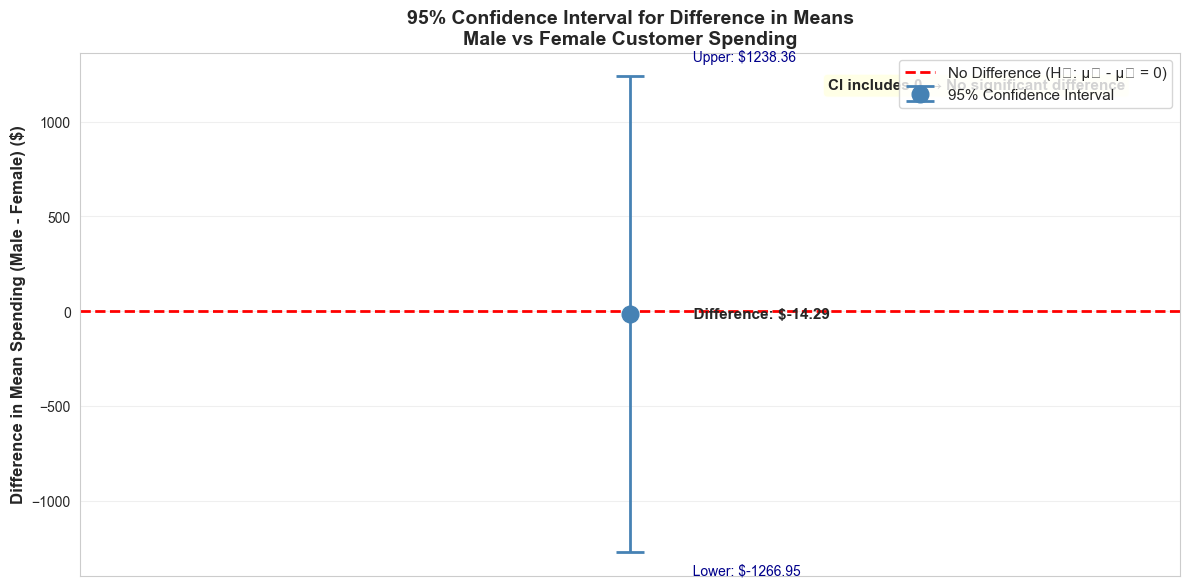

In [24]:
print("\nVISUALIZATION OF CONFIDENCE INTERVAL:")

# Create visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the confidence interval
ax.errorbar(x=0, y=mean_diff, yerr=margin_of_error, 
            fmt='o', markersize=12, capsize=10, capthick=2, 
            color='steelblue', ecolor='steelblue', linewidth=2,
            label=f'{confidence_level*100:.0f}% Confidence Interval')

# Add horizontal line at zero
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, 
           label='No Difference (H₀: μ₁ - μ₂ = 0)')

# Add labels and formatting
ax.set_ylabel('Difference in Mean Spending (Male - Female) ($)', fontsize=12, fontweight='bold')
ax.set_title(f'{confidence_level*100:.0f}% Confidence Interval for Difference in Means\n' + 
             f'Male vs Female Customer Spending', fontsize=14, fontweight='bold')
ax.set_xlim(-0.5, 0.5)
ax.set_xticks([])
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

# Add text annotations
ax.text(0.05, mean_diff, f'  Difference: ${mean_diff:.2f}', 
        verticalalignment='center', fontsize=11, fontweight='bold')
ax.text(0.05, ci_upper + 0.05*abs(ci_upper), f'  Upper: ${ci_upper:.2f}', 
        verticalalignment='bottom', fontsize=10, color='darkblue')
ax.text(0.05, ci_lower - 0.05*abs(ci_lower), f'  Lower: ${ci_lower:.2f}', 
        verticalalignment='top', fontsize=10, color='darkblue')

# Add interpretation box
interpretation = "CI includes 0 → No significant difference" if (ci_lower <= 0 <= ci_upper) else \
                "CI excludes 0 → Significant difference"
box_color = 'lightyellow' if (ci_lower <= 0 <= ci_upper) else 'lightgreen'
ax.text(0.95, 0.95, interpretation, transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor=box_color, alpha=0.8),
        fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


---
# Summary Report and Final Conclusions

In [25]:
print("COMPLETE HYPOTHESIS TEST SUMMARY REPORT")

print("RESEARCH QUESTION:")
print("\n  Is there a significant difference in average spending between male and female customers?")

print("METHODOLOGY:")
print(f"\n  Statistical Test: {test_name.title()}")
print(f"  Significance Level: α = {alpha}")
print(f"  Sample Sizes: n₁ = {n1} (Male), n₂ = {n2} (Female)")

print("KEY FINDINGS:")
print(f"\n  1. Descriptive Statistics:")
print(f"       Male mean spending: ${mean1:.2f} (SD = ${std1:.2f})")
print(f"       Female mean spending: ${mean2:.2f} (SD = ${std2:.2f})")
print(f"       Observed difference: ${abs(mean1 - mean2):.2f}")

print(f"\n  2. Test Results:")
print(f"       t({df_format}) = {t_statistic:.4f}, p = {p_value:.4f}")

print(f"\n  3. Statistical Decision:")
print(f"       {decision} the null hypothesis at α = {alpha}")

print(f"\n  4. Confidence Interval (95%):")
print(f"       Difference in means: (${ci_lower:.2f}, ${ci_upper:.2f})")

print("CONCLUSION:")

if decision == "REJECT":
    print(f"\n  There IS statistically significant evidence (p = {p_value:.4f}) that")
    print(f"  male and female customers differ in their average spending.")
    if mean1 > mean2:
        print(f"  Male customers spend significantly more than female customers.")
    else:
        print(f"  Female customers spend significantly more than male customers.")
else:
    print(f"\n  There is NO statistically significant evidence (p = {p_value:.4f}) that")
    print(f"  male and female customers differ in their average spending.")
    print(f"  The observed difference of ${abs(mean1 - mean2):.2f} can be attributed")
    print(f"  to random sampling variation.")

COMPLETE HYPOTHESIS TEST SUMMARY REPORT
RESEARCH QUESTION:

  Is there a significant difference in average spending between male and female customers?
METHODOLOGY:

  Statistical Test: Independent Samples T-Test
  Significance Level: α = 0.05
  Sample Sizes: n₁ = 489 (Male), n₂ = 511 (Female)
KEY FINDINGS:

  1. Descriptive Statistics:
       Male mean spending: $12528.31 (SD = $10159.25)
       Female mean spending: $12542.60 (SD = $10024.61)
       Observed difference: $14.29

  2. Test Results:
       t(998) = -0.0224, p = 0.9821

  3. Statistical Decision:
       FAIL TO REJECT the null hypothesis at α = 0.05

  4. Confidence Interval (95%):
       Difference in means: ($-1266.95, $1238.36)
CONCLUSION:

  There is NO statistically significant evidence (p = 0.9821) that
  male and female customers differ in their average spending.
  The observed difference of $14.29 can be attributed
  to random sampling variation.
